## Orario Wall Street
L’orario di contrattazione ufficiale della borsa americana è il seguente:  

apertura: ore <b>15:30</b> ora italiana, ovvero ore 09:30 USA;  
chiusura: ore <b>22:00</b> ora italiana, ovvero ore 16:00 USA.  

Questo è l’orario di apertura e chiusura ufficiale di Wall Street, ma si può fare trading anche prima e dopo la sessione gli orari appena indicati per la borsa americana.  
Il trading su Wall Street prima e dopo l’orario ufficiale della sessione è comunque influenzato da notizie ed eventi che si verificano a mercato chiuso.  

Gli orari di negoziazione a mercato chiuso per Wall Street sono:  

Pre mercato: dalle 14:00 (ore 08:00 USA) alle ore 15:30 (ore 09:30 USA);  
Post mercato: dalle ore 22:00 (ore 16:00 USA) alle ore 02:00 di notte (ore 20:00 USA).  

- [Load View Data](#Load-View-Data)
- [Rischiosità](#Rischiosità)
- [Find outliner](#Find-outliner)
- [Display data](#Display-data)
- [Dataset & labels](#Dataset-&-labels)
- [Assessing feature importance with Random Forests](#Assessing-feature-importance-with-Random-Forests)
- [Split dataset](#Split-dataset)
- [Analisi dei Componenti Principali (PCA)](#Analisi-dei-Componenti-Principali-(PCA))
- [Ricerca a griglia degli ensemble](#Ricerca-a-griglia-degli-ensemble)
  - [1. Linear Regression](#1.-Linear-Regression)
  - [2. Gradient Boosting Regressor](#2.-Gradient-Boosting-Regressor)
  - [3. Random Forest Regressor](#3.-Random-Forest-Regressor)
  - [4. Regression based on K-Nearest Neighbors](#4.-Regression-based-on-K-Nearest-Neighbors)
  - [5. Support Vector Regression](#5.-Support-Vector-Regression)
  - [6. MultiLayer Perceptron Regressor](#6.-MultiLayer-Perceptron-Regressor)
  - [7. XGBoost Regressor](#7.-XGBoost-Regressor)
- [Estimators](#Estimators)
- [Voting Regressor](#Voting-Regressor)
- [Mean squared error & Coefficient of determination](#Mean-squared-error-&-Coefficient-of-determination)
- [Previsioni](#Previsioni)
  - [Salvataggio modello](#Salvataggio-modello)
  - [Caricamento modello e predizione](#Caricamento-modello-e-predizione)
- [Applicazioni finanziarie](#Applicazioni-finanziarie)

In [1]:
import time
import numpy as np
import pandas as pd

import datetime as dt
from datetime import datetime, timedelta, date  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from joblib import dump, load

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor#, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA, KernelPCA
from sklearn.multioutput import MultiOutputRegressor
from sklearn import metrics
import xgboost as xgb 

import yfinance as yf
import pandas_datareader.data as web


import warnings
warnings.filterwarnings("ignore")

print("done...")

done...


## Load View Data

In [2]:
#start_val = '2019-01-15'#(dt.now() - timedelta(days=600)).strftime('%Y-%m-%d')
#end_val =  '2020-02-10'#dt.now().strftime('%Y-%m-%d') 
start = dt.datetime(2010,4,15).strftime('%Y-%m-%d')
end = datetime.now().strftime('%Y-%m-%d') #dt.datetime(2020,2,10)
#end = dt.datetime(2020,2,10).strftime('%Y-%m-%d')
print('start: ' + start)
print('end: ' + end)

start: 2010-04-15
end: 2021-01-21


In [3]:
df  = web.DataReader('^GDAXI',   'yahoo', start, end).drop(columns=['Close','Volume']).rename(columns={"Adj Close": "close"})#new york
df['ema'] = df['close'].ewm(com=0.5).mean()
df['momentum'] = df['close']-1 
#df1 = web.DataReader('^FTSE', 'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_LD"})#londra
df2 = web.DataReader('^DJI',  'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_DJ"})#new york
df10 = web.DataReader('^FCHI','yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_PG"})#parigi
df3 = web.DataReader('^BSESN','yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_BS"})#bombay
df4 = web.DataReader('^N225', 'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_NK"})#tokyo
df0 = web.DataReader('^N100', 'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_EN"})#euronext
df5 = web.DataReader('^HSI',  'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_HK"})#hong kong
df6 = web.DataReader('CL=F',  'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_CO"})#petrolio
df7 = web.DataReader('GC=F',  'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_GO"})#oro
df8 = web.DataReader('^TNX',  'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_TR"})#Treasury Yield 10 Y
df9 = web.DataReader('EURUSD=X','yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_ED"})#euro/dollaro

df11 = web.DataReader('YM=F', 'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_FD"})#Mini Dow Jones Indus
df12 = web.DataReader('ZB=F', 'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_FB"})#U.S. Treasury Bond Futures
df13 = web.DataReader('GC=F', 'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_FG"})#Gold Future
df14 = web.DataReader('CL=F', 'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_FO"})#Crude Oil Future
df15 = web.DataReader('ZN=F', 'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_FT"})#10-Year T-Note Futures
df16 = web.DataReader('^FVX', 'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_TF"})#Treasury Yield 5 Years
df17 = web.DataReader('^IRX', 'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_TA"})#13 Week Treasury Bill

#df_TMP = pd.DataFrame()   'Close_FD','Close_FB','Close_FG','Close_FO','Close_FT',
#df['15MA'] = df['close'].rolling(window=15).mean()
#df_TMP['SD'] = df['close'].rolling(window=15).std()
#df['upperband'] = df['15MA'] + 2*df_TMP['SD']
#df['lowerband'] = df['15MA'] - 2*df_TMP['SD']
#df.dropna(inplace=True)

#df = pd.merge(df, df1, on='Date', how='left')
df = pd.merge(df, df2, on='Date', how='left')
df = pd.merge(df, df10, on='Date', how='left')
df = pd.merge(df, df3, on='Date', how='left')
df = pd.merge(df, df4, on='Date', how='left')
df = pd.merge(df, df0, on='Date', how='left')
df = pd.merge(df, df5, on='Date', how='left')
df = pd.merge(df, df6, on='Date', how='left')
df = pd.merge(df, df7, on='Date', how='left')
df = pd.merge(df, df8, on='Date', how='left')
df = pd.merge(df, df9, on='Date', how='left')

df = pd.merge(df, df11, on='Date', how='left')
df = pd.merge(df, df12, on='Date', how='left')
df = pd.merge(df, df13, on='Date', how='left')
df = pd.merge(df, df14, on='Date', how='left')
df = pd.merge(df, df15, on='Date', how='left')
df = pd.merge(df, df16, on='Date', how='left')
df = pd.merge(df, df17, on='Date', how='left')

dataset = df.replace(to_replace = 0.00, value = np.nan).interpolate(method='time')
dataset.dropna(inplace=True)
#ricampionamento
#dataset = dataset.resample('W').last()
dataset['target'] = dataset['close'].shift(-1)

In [4]:
dataset['Close_DJ'] = dataset['Close_DJ'].shift(1)
#dataset['open_1'] = dataset['Open'].shift(-1)
dataset['high_1'] = dataset['High'].shift(-1)
dataset['low_1'] = dataset['Low'].shift(-1)
dataset['target'] = dataset['close'].shift(-1)
#dataset = dataset.reindex(['High','Low','Open','close','ema','momentum','15MA','upperband','lowerband','Close_DX','Close_BS','Close_NK','open_1','high_1','low_1','target'], axis=1)
#dataset = dataset.reindex(['High','Low','Open','close','ema','momentum','Close_DJ','Close_BS','Close_NK','open_1','high_1','low_1','target'], axis=1)
dataset = dataset.reindex(['High','Low','Open','close','ema','momentum','Close_DJ','Close_PG','Close_EN','Close_BS','Close_HK','Close_NK','Close_CO','Close_GO','Close_TR','Close_ED','Close_FD','Close_FB','Close_FG','Close_FO','Close_FT','Close_TF','Close_TA','high_1','low_1','target'], axis=1)
input_data = dataset.iloc[-2:-1,:-3]
#dataset.dropna(inplace=True)
dataset = dataset.iloc[1:-2,:]

#dataset = dataset.resample('2W-FRI').last()
len(dataset)

2723

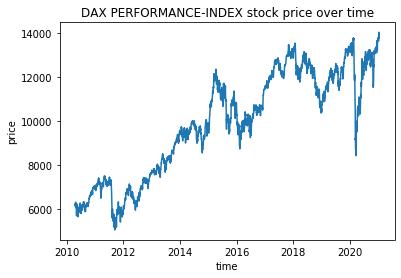

In [5]:
plt.plot(dataset["close"])
plt.title("DAX PERFORMANCE-INDEX stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [7]:
#dataset = dataset.sample(frac=1)
input_data

,High,Low,Open,close,ema,momentum,Close_DJ,Close_PG,Close_EN,Close_BS,...,Close_GO,Close_TR,Close_ED,Close_FD,Close_FB,Close_FG,Close_FO,Close_FT,Close_TF,Close_TA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-19,13940.049805,13804.459961,13935.929688,13815.05957,13826.427336,13814.05957,30814.259766,5598.609863,1122.180054,49398.289062,...,1839.5,1.092,1.207729,30828.0,168.96875,1839.5,52.98,136.9375,0.449,0.073


In [ ]:
#dataset = dataset.diff(periods=1)[1:-1]

In [ ]:
dataset.info()

## Rischiosità

In [ ]:
#cols = dataset.columns
#var = dataset.var()
#var_arr = [[math.sqrt(x) for x in var]]
#
#var_df = pd.DataFrame(data=var_arr, columns=cols).T
#var_df

## Find outliner

inlier_mask 2720
outlier_mask 3


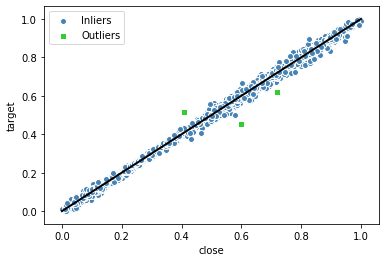

In [6]:
#sc_x = StandardScaler()
#sc_y = StandardScaler()
sc_x = MinMaxScaler()
sc_y = MinMaxScaler()
X_std = sc_x.fit_transform(dataset[['close']])
y_std = sc_y.fit_transform(dataset[['target']])

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=0.08, 
                         random_state=0)

ransac.fit(X_std, y_std)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

print('inlier_mask {}'.format(len(X_std[inlier_mask])) )
print('outlier_mask {}'.format(len(X_std[outlier_mask])))

line_X = np.arange(0, 2, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])


plt.scatter(X_std[inlier_mask], y_std[inlier_mask], c='steelblue', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X_std[outlier_mask], y_std[outlier_mask], c='limegreen', edgecolor='white',  marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('close')
plt.ylabel('target')
plt.legend(loc='upper left')

In [8]:
dataset['inlier_mask'] = ransac.inlier_mask_
dataset = dataset.loc[dataset['inlier_mask'] == True].drop(columns=['inlier_mask'])
print(len(dataset))

2720


## Display data

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2720 entries, 2010-04-16 to 2021-01-15
Data columns (total 26 columns):
High        2720 non-null float64
Low         2720 non-null float64
Open        2720 non-null float64
close       2720 non-null float64
ema         2720 non-null float64
momentum    2720 non-null float64
Close_DJ    2720 non-null float64
Close_PG    2720 non-null float64
Close_EN    2720 non-null float64
Close_BS    2720 non-null float64
Close_HK    2720 non-null float64
Close_NK    2720 non-null float64
Close_CO    2720 non-null float64
Close_GO    2720 non-null float64
Close_TR    2720 non-null float64
Close_ED    2720 non-null float64
Close_FD    2720 non-null float64
Close_FB    2720 non-null float64
Close_FG    2720 non-null float64
Close_FO    2720 non-null float64
Close_FT    2720 non-null float64
Close_TF    2720 non-null float64
Close_TA    2720 non-null float64
high_1      2720 non-null float64
low_1       2720 non-null float64
target      2720 non-null

In [ ]:
sns.pairplot(dataset)

In [ ]:
sns.distplot(dataset['target'])

In [ ]:
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1)

## Dataset & labels

In [10]:
X = dataset.drop(columns = ['high_1','low_1','target'])
y = dataset[['target']]
y_multi = dataset[['high_1','low_1','target']]

In [11]:
X.columns[:]

Index(['High', 'Low', 'Open', 'close', 'ema', 'momentum', 'Close_DJ',
       'Close_PG', 'Close_EN', 'Close_BS', 'Close_HK', 'Close_NK', 'Close_CO',
       'Close_GO', 'Close_TR', 'Close_ED', 'Close_FD', 'Close_FB', 'Close_FG',
       'Close_FO', 'Close_FT', 'Close_TF', 'Close_TA'],
      dtype='object')

## Assessing feature importance with Random Forests

 1) momentum                       0.376696
 2) close                          0.366025
 3) ema                            0.208252
 4) Low                            0.024926
 5) High                           0.021199
 6) Open                           0.001680
 7) Close_NK                       0.000103
 8) Close_ED                       0.000093
 9) Close_FD                       0.000087
10) Close_BS                       0.000083
11) Close_DJ                       0.000083
12) Close_EN                       0.000077
13) Close_HK                       0.000076
14) Close_PG                       0.000075
15) Close_FT                       0.000073
16) Close_TF                       0.000067
17) Close_TA                       0.000066
18) Close_CO                       0.000065
19) Close_FO                       0.000064
20) Close_GO                       0.000054
21) Close_FG                       0.000054
22) Close_FB                       0.000054
23) Close_TR                    

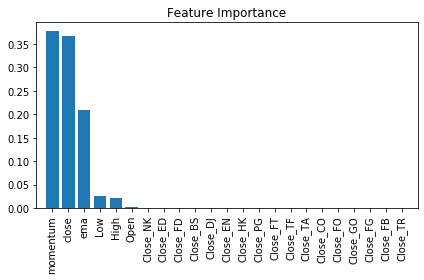

In [12]:
feat_labels = X.columns[:]

rf_reg_t = RandomForestRegressor(random_state=1, n_estimators=500, n_jobs=-1)
rf_reg_t.fit(X, y_multi)

importances = rf_reg_t.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))   

plt.title('Feature Importance')
plt.bar(range(X.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X.shape[1]), 
           feat_labels[indices], 
           rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [13]:
sfm = SelectFromModel(rf_reg_t, threshold=0.01, prefit=True)
X_selected = sfm.transform(X)
print('Number of features that meet this threshold criterion:', X_selected.shape[1])

selected_feature = [feat_labels[indices[f]] for f in range(X_selected.shape[1])]
X = dataset[selected_feature]
input_data = input_data[selected_feature]
X.head()

Number of features that meet this threshold criterion: 5


,momentum,close,ema,Low,High
Date,,,,,
2010-04-16,6179.899902,6180.899902,6208.537476,6162.839844,6305.399902
2010-04-19,6161.439941,6162.439941,6176.623798,6140.379883,6190.859863
2010-04-20,6263.229980,6264.229980,6235.757971,6172.569824,6267.540039
2010-04-21,6229.379883,6230.379883,6232.157763,6229.180176,6281.379883
2010-04-22,6167.720215,6168.720215,6189.807971,6141.069824,6286.359863


In [ ]:
#perc = int(len(X) * 0.2)
#
#X_valid = X[len(X)-perc:]
#X = X[:-perc]
#
#y = y[:-perc]
#
#y_multi_valid = y_multi[len(y_multi)-perc:]
#y_multi = y_multi[:-perc]
#
#print(len(X_valid))
#print(len(X))
#print(len(y_multi_valid))
#print(len(y_multi))

## Split dataset

In [14]:
sc = MinMaxScaler()
X_ = sc.fit_transform(X)
y_ = sc.fit_transform(y)

X_train, X_test,  y_train, y_test = train_test_split(X_, y_, test_size=0.2)

sc_multi_X = MinMaxScaler()
sc_multi = MinMaxScaler()
X_multi_ = sc_multi_X.fit_transform(X)
y_multi_ = sc_multi.fit_transform(y_multi)

X_train_multi, X_test_multi,  y_train_multi, y_test_multi = train_test_split(X_multi_, y_multi_, test_size=0.1, random_state=1)

## Analisi dei Componenti Principali (PCA)

In [ ]:
#pca = KernelPCA(n_components=8, kernel='rbf', random_state=1)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

## Ricerca a griglia degli ensemble

## 1. Linear Regression

In [15]:
lin_reg = LinearRegression() 
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

(-0.15, 0.15)

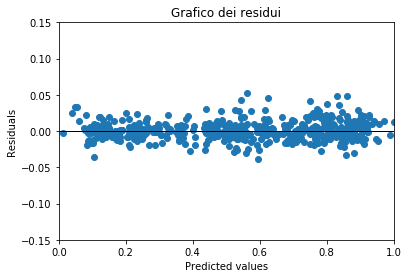

In [17]:
plt.scatter(y_test_pred, y_test_pred - y_test)
plt.title("Grafico dei residui")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y=0, xmin=0, xmax=1.0, color='black', lw=1)
plt.xlim([0, 1])
plt.ylim([-0.150, 0.150])

In [18]:
print('[Train] Mean squared error: %.5f - Coefficient of determination: %.5f' % (mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)))
print('[Test ] Mean squared error: %.5f - Coefficient of determination: %.5f' % (mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)))

[Train] Mean squared error: 0.00018 - Coefficient of determination: 0.99744
[Test ] Mean squared error: 0.00015 - Coefficient of determination: 0.99788


## 2. Gradient Boosting Regressor

In [19]:
gb_reg = GradientBoostingRegressor(random_state=1)

params_rf =  [{'n_estimators':np.arange(10,100,5)}]
               #,'max_features':np.arange(1,10,1)}]

gb_gs = GridSearchCV(gb_reg, param_grid=params_rf, cv=3, refit=True, scoring="neg_mean_squared_error", n_jobs=-1)

gb_gs.fit(X_train, y_train)
gb_best = gb_gs.best_estimator_

print(gb_gs.best_params_)

{'n_estimators': 65}


## 3. Random Forest Regressor

In [20]:
rf_reg = RandomForestRegressor(random_state=1)

params_rf = [{'n_estimators': [3,5,7,10,15,20,30,40,50],
              'max_depth':[4,5,6,7,8,9,10]}]
rf_gs = GridSearchCV(rf_reg, param_grid=params_rf, cv=5, refit=True, scoring="neg_mean_squared_error", n_jobs=-1)

rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_

print(rf_gs.best_params_)

{'max_depth': 6, 'n_estimators': 50}


## 4. Regression based on K-Nearest Neighbors

In [21]:
knn_reg = KNeighborsRegressor()

params_rf =  [{'n_neighbors':np.arange(1,20,1),
                'weights':['distance','uniform']}]
            
knn_gs = GridSearchCV(knn_reg, param_grid=params_rf, cv=5, refit=True, scoring="neg_mean_squared_error", n_jobs=-1)

knn_gs.fit(X_train,y_train)
knn_best = knn_gs.best_estimator_

print(knn_gs.best_params_)

{'n_neighbors': 19, 'weights': 'distance'}


## 5. Support Vector Regression

In [ ]:
#saltare
svr_reg = SVR()

params_rf =  [{'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],
               'gamma':[0.001, 0.01, 0.1, 1.0, 10.0],
               'epsilon':[0.0001, 0.001, 0.01, 0.1, 1.0],
               'kernel':['rbf']}]
            
svr_gs = GridSearchCV(svr_reg, param_grid=params_rf, cv=5, refit=True, scoring="neg_mean_squared_error", n_jobs=-1)

svr_gs.fit(X_train,y_train)
svr_best = svr_gs.best_estimator_

print(svr_gs.best_params_)

## 6. MultiLayer Perceptron Regressor

In [22]:
mlp_reg = MLPRegressor(learning_rate_init=0.01, early_stopping=True)

params_clf = [{'learning_rate': ['constant', 'invscaling', 'adaptive'] , 
               'hidden_layer_sizes': [(100,100)],
               'alpha': [0.01, 0.001, 0.0001],
               'momentum': [0],
               'solver': ['sgd','lbfgs','adam'],
               'activation': ['identity', 'tanh', 'relu']}]
mlp_gs = GridSearchCV(mlp_reg, param_grid=params_clf, cv=5, refit=True, scoring="neg_mean_squared_error", n_jobs=-1)
#mlp_gs = RandomizedSearchCV(mlp_reg, params_clf, cv=5, refit=True, random_state=1, scoring="neg_mean_squared_error", n_jobs=-1)

mlp_gs.fit(X_train, y_train)
mlp_best = mlp_gs.best_estimator_

print(mlp_gs.best_params_)

{'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'momentum': 0, 'solver': 'lbfgs'}


## 7. XGBoost Regressor

In [23]:
xgb_reg = xgb.XGBRegressor(verbose=2)

params_clf = [{'learning_rate ': [0.009,0.008,0.007,0.005,0.01,0.02],
               'objective': ['reg:squarederror'],
               'n_estimators': [10,20,30,40,50,70]}]
xgb_gs = GridSearchCV(xgb_reg, param_grid=params_clf, cv=5, refit=True, scoring="neg_mean_squared_error", n_jobs=-1)
#xgb_gs = RandomizedSearchCV(xgb_reg, params_clf, cv=5, refit=True, random_state=1, scoring="neg_mean_squared_error", n_jobs=-1)

xgb_gs.fit(X_train,y_train)
xgb_bst = xgb_gs.best_estimator_

print(xgb_gs.best_params_)

[00:37:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_rate , verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'learning_rate ': 0.009, 'n_estimators': 20, 'objective': 'reg:squarederror'}


#### Now let’s check the accuracy scores of all of our models on our test data.
score returns the coefficient of determination R^2 of the prediction.

In [24]:
print('lin_reg: {}'.format(round( lin_reg.score(X_test, y_test), 4)))
print('gbt_bst: {}'.format(round( gb_best.score(X_test, y_test), 4)))
print('rf_best: {}'.format(round( rf_best.score(X_test, y_test), 4)))
print('knn_bst: {}'.format(round(knn_best.score(X_test, y_test), 4)))
#print('svr_bst: {}'.format(round(svr_best.score(X_test, y_test), 4)))
print('mlp_bst: {}'.format(round(mlp_best.score(X_test, y_test), 4)))
print('xgb_bst: {}'.format(round( xgb_bst.score(X_test, y_test), 4)))

lin_reg: 0.9979
gbt_bst: 0.9973
rf_best: 0.9975
knn_bst: 0.9975
mlp_bst: 0.9976
xgb_bst: 0.9972


## Preconfigurazioni

In [ ]:
#lin_reg = LinearRegression()
#gb_best = GradientBoostingRegressor(random_state=1, max_features=6, n_estimators=65)
#rf_best = RandomForestRegressor(random_state=1, max_depth=7, n_estimators=40)
#knn_best = KNeighborsRegressor(n_neighbors=3, weights='distance')
#svr_best = SVR(C=1000.0, epsilon=0.0001, gamma=0.001, kernel='rbf')
#mlp_best = MLPRegressor(learning_rate_init=0.01, early_stopping=True, activation='identity', alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate='constant', momentum=0, solver='lbfgs')
#xgb_bst = xgb.XGBRegressor(verbose=2, learning_rate=0.009, n_estimators=20, objective='reg:squarederror')

# Estimators

In [25]:
estimators = [('lin_reg', lin_reg), ('gb_best', gb_best), ('rf_best', rf_best),  ('knn_bst', knn_best), ('mlp_best', mlp_best), ('xgb_bst', xgb_bst)]

## Voting Regressor
The idea behind the VotingRegressor is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

In [26]:
ensemble = VotingRegressor(estimators, n_jobs=-1)

#ensemble.fit(X_train,y_train)
ensemble_multi = MultiOutputRegressor(estimator=ensemble)
ensemble_multi.fit(X_train_multi,y_train_multi)

ens_train_multi = ensemble_multi.predict(X_train_multi)
ens_pred_multi = ensemble_multi.predict(X_test_multi)

len(X_test_multi)

272

### Mean squared error & Coefficient of determination

In [27]:
print('[Train High] MSE: %.5f - R2: %.5f' % (mean_squared_error(y_train_multi[:,0], ens_train_multi[:,0]), r2_score(y_train_multi[:,0], ens_train_multi[:,0])))
print('[Test  High] MSE: %.5f - R2: %.5f' % (mean_squared_error(y_test_multi[:,0], ens_pred_multi[:,0]), r2_score(y_test_multi[:,0], ens_pred_multi[:,0])))

print('[Train  Low] MSE: %.5f - R2: %.5f' % (mean_squared_error(y_train_multi[:,1], ens_train_multi[:,1]), r2_score(y_train_multi[:,1], ens_train_multi[:,1])))
print('[Test   Low] MSE: %.5f - R2: %.5f' % (mean_squared_error(y_test_multi[:,1], ens_pred_multi[:,1]), r2_score(y_test_multi[:,1], ens_pred_multi[:,1])))

print('[Tran Close] MSE: %.5f - R2: %.5f' % (mean_squared_error(y_train_multi[:,2], ens_train_multi[:,2]), r2_score(y_train_multi[:,2], ens_train_multi[:,2])))
print('[Test Close] MSE: %.5f - R2: %.5f' % (mean_squared_error(y_test_multi[:,2], ens_pred_multi[:,2]), r2_score(y_test_multi[:,2], ens_pred_multi[:,2])))

[Train High] MSE: 0.00005 - R2: 0.99924
[Test  High] MSE: 0.00008 - R2: 0.99881
[Train  Low] MSE: 0.00007 - R2: 0.99902
[Test   Low] MSE: 0.00011 - R2: 0.99836
[Tran Close] MSE: 0.00010 - R2: 0.99861
[Test Close] MSE: 0.00015 - R2: 0.99777


(-0.05, 0.05)

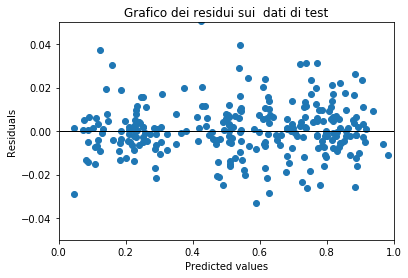

In [28]:
plt.scatter(ens_pred_multi[:,2], ens_pred_multi[:,2] - y_test_multi[:,2])
plt.title("Grafico dei residui sui  dati di test")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y=0, xmin=0, xmax=1.0, color='black', lw=1)
plt.xlim([0, 1])
plt.ylim([-0.05, 0.05])

In [29]:
pred_ens_rev = sc_multi.inverse_transform(ens_pred_multi)
y_test_rev = sc_multi.inverse_transform(y_test_multi)

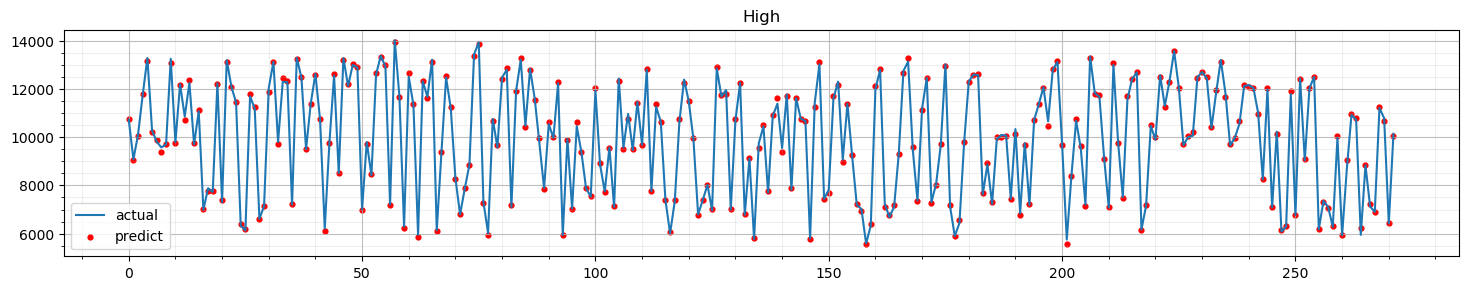

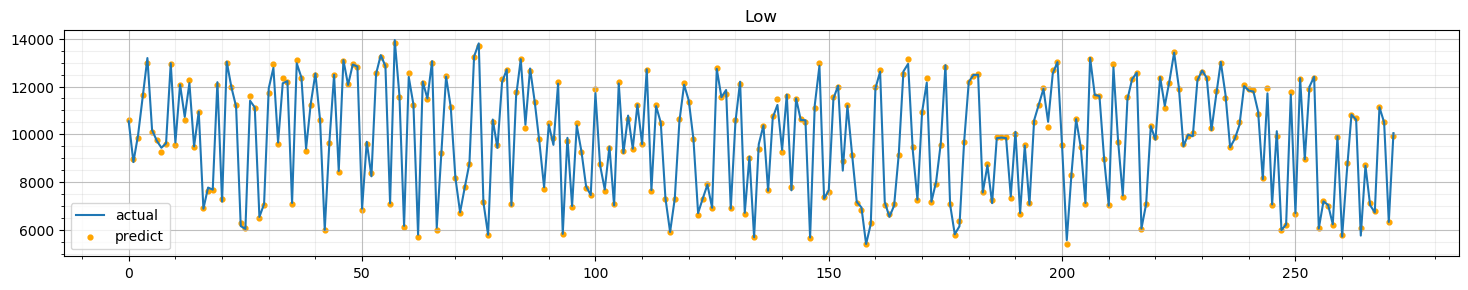

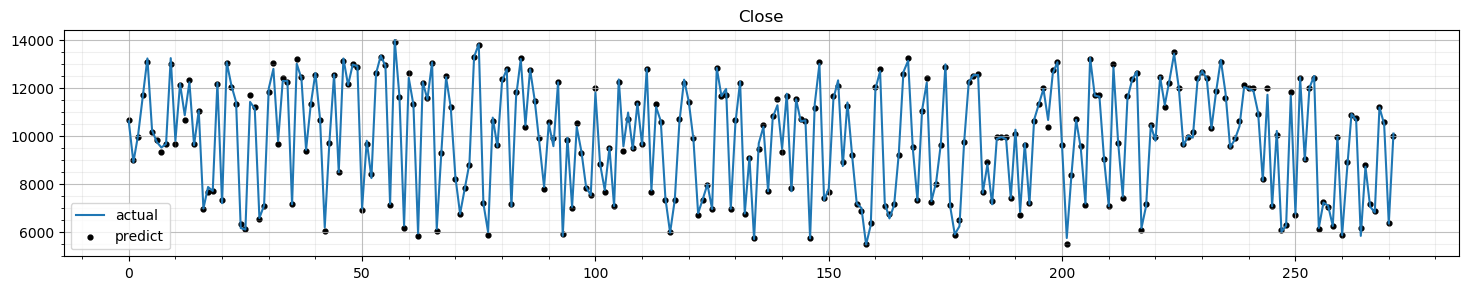

In [30]:
plt.figure(figsize=(18, 3), dpi=100)
plt.plot(y_test_rev[:,0], label='actual')
plt.scatter(np.arange(0,len(pred_ens_rev[:,1]),1), pred_ens_rev[:,0], label='predict', color='red', s=12)
plt.title("High")
plt.legend(loc="lower left")
plt.minorticks_on()
plt.grid(b=True, which='major', alpha=0.8)
plt.grid(b=True, which='minor', alpha=0.2)

plt.figure(figsize=(18, 3), dpi=100)
plt.plot(y_test_rev[:,1], label='actual')
plt.scatter(np.arange(0,len(pred_ens_rev[:,1]),1), pred_ens_rev[:,1], label='predict', color='orange', s=12)
plt.title("Low")
plt.legend(loc="lower left")
plt.minorticks_on()
plt.grid(b=True, which='major', alpha=0.8)
plt.grid(b=True, which='minor', alpha=0.2)

plt.figure(figsize=(18, 3), dpi=100)
plt.plot(y_test_rev[:,2], label='actual')
plt.scatter(np.arange(0,len(pred_ens_rev[:,2]),1), pred_ens_rev[:,2], label='predict', color='black', s=12)
plt.title("Close")
plt.legend(loc="lower left")
plt.minorticks_on()
plt.grid(b=True, which='major', alpha=0.8)
plt.grid(b=True, which='minor', alpha=0.2)

# Previsioni

In [31]:
input_data

,momentum,close,ema,Low,High
Date,,,,,
2021-01-19,13814.05957,13815.05957,13826.427336,13804.459961,13940.049805


In [32]:
input_data_ = sc_multi_X.transform(input_data)
prediction_ = ensemble_multi.predict(input_data_)
prediction = sc_multi.inverse_transform(prediction_)
prediction

array([[13888.35493874, 13748.44067244, 13791.38791962]])

In [33]:
Date = input_data.copy().reset_index()['Date'][0]
prediction_ = [round(x, 4) for x in prediction[0]]
d_prediction = np.append(Date, prediction_).reshape(1,-1)
d_prediction_df = pd.DataFrame(d_prediction, columns=[ 'Date', 'high_1','low_1','target']).set_index('Date')

result = pd.merge(input_data, d_prediction_df, on='Date')
result['pct_pred'] = ((result['target'] - result['close']) / result['close']) * 100
result = round(result, 4)
result

,momentum,close,ema,Low,High,high_1,low_1,target,pct_pred
Date,,,,,,,,,
2021-01-19,13814.0596,13815.0596,13826.4273,13804.46,13940.0498,13888.4,13748.4,13791.4,-0.171347


<br><br>

In [ ]:
#result.drop(columns = ['Close_EN','Close_HK']).to_csv('result.csv', mode='a', header=False)
result_save = result[['High','Low','Open','close','open_1','high_1','low_1','target']]
result_save.to_csv('result.csv', mode='a', header=False)

In [ ]:
result_df = round(pd.read_csv('result.csv', index_col='Date'), 2)
result_df['target_reale'] = result_df['close'].shift(-1)
result_df['pct_pred'] = round(((result_df['target'] - result_df['close']) / result_df['close']) * 100, 2)
result_df['pct_reale'] =  round(result_df['target_reale'].pct_change() * 100, 2)
result_df

In [ ]:
#29.910,37+37,90 (+0,13%)
#Alla chiusura: 2:07PM EST
#plt.figure(figsize=(18, 3), dpi=100)
plt.plot(result_df['target_reale'], label='actual')
#plt.plot(result_df['target'], label='predict')
plt.scatter(np.arange(0,len(result_df['target']),1), result_df['target'], label='predict', color='orange', s=12)
plt.legend()

#### Salvataggio modello

In [ ]:
dump(ensemble_multi, 'filename.joblib') 
dump(sc_multi_X, 'sc_multi_X.joblib') 
dump(sc_multi, 'sc_multi.joblib') 
dump(selected_feature, 'selected_feature.joblib')

#### Caricamento modello e predizione

In [ ]:
clf = load('filename.joblib') 
clf_sc_multi_X = load('sc_multi_X.joblib') 
clf_sc_multi = load('sc_multi.joblib') 
clf_selected_feature = load('selected_feature.joblib') 

input_data = input_data[clf_selected_feature]
input_data_ = clf_sc_multi_X.transform(input_data)
prediction_ = clf.predict(input_data_)
prediction = clf_sc_multi.inverse_transform(prediction_)
prediction

## Stacked generalization
Stacked generalization is a method for combining estimators to reduce their biases. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

In [ ]:
stk_reg = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor(random_state=42))

stk_reg.fit(X_train, y_train)

In [ ]:
stk_reg_predictions = stk_reg.predict(X_test)

In [ ]:
print('Mean squared error: %.4f' % mean_squared_error(y_test, stk_reg_predictions))
print('Coefficient of determination: %.4f' % r2_score(y_test, stk_reg_predictions))

In [ ]:
pred_ens_rev = sc.inverse_transform(stk_reg_predictions.reshape(-1, 1))
y_test_rev = sc.inverse_transform(y_test)

In [ ]:
plt.figure(figsize=(18, 3), dpi=100)
plt.plot(y_test_rev, label='actual')
plt.plot(pred_ens_rev, label='predict')
plt.legend()

### Multiple stacking layers
[Multiple stacking layers can be achieved by assigning final_estimator to a StackingClassifier or StackingRegressor:](https://scikit-learn.org/stable/modules/ensemble.html#stacking)

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.svm import SVR
import xgboost as xgb 

In [ ]:
final_estimator = StackingRegressor(
        estimators=[('ridge', RidgeCV()),
                    ('lasso', LassoCV(random_state=42)),
                    ('svr',   SVR(C=1, gamma=1e-6))],
        final_estimator=GradientBoostingRegressor(random_state=42)
)

final_layer = StackingRegressor(
     estimators=[('rf_sr',   RandomForestRegressor(random_state=42)),
                 ('gbrt_sr', GradientBoostingRegressor(random_state=42))],
     final_estimator=final_estimator#RidgeCV()
)

multi_layer_regressor = StackingRegressor(
    estimators=estimators, 
    final_estimator=final_layer
)

multi_layer_regressor.fit(X_train, y_train)

In [ ]:
multi_layer_regressor_predictions = multi_layer_regressor.predict(X_test)

In [ ]:
print('Mean squared error: %.4f' % mean_squared_error(y_test, multi_layer_regressor_predictions))
print('Coefficient of determination: %.4f' % r2_score(y_test, multi_layer_regressor_predictions))

In [ ]:
pred_ens_rev = sc.inverse_transform(multi_layer_regressor_predictions.reshape(-1, 1))
y_test_rev = sc.inverse_transform(y_test)

In [ ]:
plt.figure(figsize=(18, 3), dpi=100)
plt.plot(y_test_rev, label='actual')
plt.plot(pred_ens_rev, label='predict')
plt.legend()

### MultiOutputRegressor

In [ ]:
X = dataset.drop(columns = ['date','target'])
y = dataset[['high', 'low', 'target']]

sc = MinMaxScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

In [ ]:
clf = MultiOutputRegressor(Ridge(random_state=123)).fit(X, y)

In [ ]:
clf.predict(X_test)

<br><br>
### Unione Dataframe

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import numpy as np

In [ ]:
start = dt.datetime(2019,1,1)
end = dt.datetime(2020,1,10)

df = web.DataReader('^DJI', 'yahoo', start, end).drop(columns=['Close','Volume']).rename(columns={"Adj Close": "close"})#new york
df2 = web.DataReader('^GDAXI', 'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_DX"})#berlino
df3 = web.DataReader('^BSESN', 'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_BS"})#bombay
df4 = web.DataReader('^N225', 'yahoo', start, end).drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_NK"})#tokyo

df['Ema'] = df['close'].ewm(com=0.5).mean()
df['Momentum'] = df['close']-1 

df = pd.merge(df, df2, on='Date', how='left')
df = pd.merge(df, df3, on='Date', how='left')
df = pd.merge(df, df4, on='Date', how='left')

dataset = df.replace(to_replace = 0.00, value = np.nan).interpolate(method='time')
dataset.dropna(inplace=True)
dataset['target'] = dataset['close'].shift(-1)

In [ ]:
dataset[:-1].info()

### Ricampionamento

In [ ]:
df_ric = pd.DataFrame()

In [ ]:
dataset = dataset.resample('W').last()

In [ ]:
dataset['pct_change'] = dataset['Close'].pct_change() * 100

In [ ]:
dataset.head()

In [ ]:
media = dataset['pct_change'].mean()

In [ ]:
media

<br>

# Applicazioni finanziarie
Costruzione di una struttura solida per poter eseguire il programma per la frontiera efficente

### Correlazione fra due titoli
In ambito finanziario, per correlazione si intende un valore statistico che misura come due titoli si influenzano reciprocamente.  
La correlazione positiva (corr=1) quando un titolo si muove e l'altro lo segue nella medesima direzione. Invece si parla di correlazione negativa (corr=-1) quando un titolo si muove in una direzione e l'altro va nel senso opposto. Un indice di correlazione pari a 0 indica che i titoli non hanno alcuna correlazione.  
La sintassi dell'istruzione per calcolare la correlazione è:

In [ ]:
df_corr = pd.DataFrame()
df_corr['close_pct'] = dataset['close'].pct_change()
df_corr['Close_DX_pct'] = dataset['Close_DX'].pct_change()
df_corr.dropna(inplace=True)

corr = df_corr['close_pct'].corr(df_corr['Close_DX_pct'])
corr

### Rischiosità di un titolo
La rischiosità di un titolo si calcola in termini di varianza dei rendimenti. Maggiore è la varianza, maggiore è la volatilità del titolo e quindi più alta è la probabilità di subire una perdita.  
In sostanza, un titolo tanto più è rischioso tanto più il suo prezzo tende a cambiare sia in velocità che in quantità.  
Si prendono in considerazione le variazioni percentuali e il calcolo della varianza. In molti casi viene utilizzata la deviazione standard.

In [ ]:
var = df_corr['Close_DX_pct'].var()
math.sqrt(var)

### Rendimento atteso
Con rendimento atteso di un titolo si intende la stima del suo probabile rendimento futuro. Una delle metodologie per calcolarlo è effettuare la  media dei rendimenti passati.  
Si ottiene calcolando la media delle variazioni percentuali.

In [ ]:
rendimento_atteso = df_corr['Close_DX_pct'].mean()
rendimento_atteso

### Rischiosità di portafoglio
Nella finanza il portafoglio rappresenta l'insieme di titoli detenuti da un investitore. Logicamente è possibile calcolare la rischiosità, oltre che di un singolo titolo, anche dell'intero portafoglio.  
La rischiosità di portafoglio non è però data dalla media ponderata delle rischiosità dei singoli titoli, in quanto questa non coglie l'effetto diversificazione dato dalla non perfetta correlazione positiva dei rendimenti dei due titoli in portafoglio.  
Nel calcolo bisognerà pertanto tenere in considerazione anche la correlazione fra i due titoli.  
Es:  
Se in portafoglio si hanno due titoli con correlazione 0.5, significa che se un titolo perde un valore uguale a 10 l'altro perde 5.  
Se in portafoglio si hanno due titoli con correlazione 1.0, significa che se un titolo perde un valore uguale a 10 anche l'altro perde 10.  

Sono necessariele le variazioni percentuali e il calcolo della varianza e della deviazione standard, ossia la rischiosità, di ciascun titolo, il calcolo della correlazione dei due titoli. La formula per calcolare la rischiosità di due titoli è:

$ \sigma_{p} = \sqrt { (X_{1} * \sigma_{1})^2 + (X_{2} * \sigma_{2})^2 + 2 * X_{1} * X_{2} * \sigma_{1} * \sigma_{2}  * corr_{1,2} } $  
dove:  
$ X_{1} e X_{2} $ sono la percentuale di ciascun titolo nel portafoglio  
$ \sigma_{1} $ e $ \sigma_{2} $ le deviazioni standard di ciascun titolo  
$ corr_{1,2} $ correlazione fra i due titoli

In [ ]:
df_DJI = pd.DataFrame()
df_DAX = pd.DataFrame()

df_DJI['DJI'] = dataset['close']
df_DAX['DAX'] = dataset['Close_DX']

#calcolo dei rendimenti
df_DJI['Rendimenti'] = df_DJI.pct_change()
df_DAX['Rendimenti'] = df_DAX.pct_change()

#rimozione Nan
df_DJI.dropna(inplace=True)
df_DAX.dropna(inplace=True)

#calcolo della varianza
var1 = df_DJI['Rendimenti'].var()
var2 = df_DAX['Rendimenti'].var()

#calcolo della deviazione standard
dev1 = math.sqrt(var1)
dev2 = math.sqrt(var2)

#calcolo della correlazione
corr = df_DJI['Rendimenti'].corr(df_DAX['Rendimenti'])

varianza_P = (0.5 * dev1)**2 + (0.5 * dev2)**2 + 2 * 0.5 * 0.5 * dev1 * dev2 * corr
rischiosita_portafoglio = math.sqrt(varianza_P)

rischiosita_portafoglio

### Rendimento atteso di portafoglio
Il rendimento atteso di portafoglio è dato semplicemente dalla media ponderata (a seconda della percentuale di un titolo nel portafoglio rispetto a l'altro) dei rendimenti attesi dei singoli titoli.  
Sono necessarie le variazioni percentuali e il calcolo  della media.

In [ ]:
media1 = df_DJI['Rendimenti'].mean()
media2 = df_DAX['Rendimenti'].mean()

rendimento_atteso = 0.5 * media1 + 0.5 * media2
rendimento_atteso

### Frontiera efficiente

In [ ]:
dfZ  =  web.DataReader('YM=F',  'yahoo', start, end)#.drop(columns=['Open','High','Low','Close', 'Volume']).rename(columns={"Adj Close": "Close_GO"})
dfZ.info()

In [ ]:
dfZ